# Analyse Gemiddeld 4

Wordt er in de eerste helft significant meer of minder gescoord dan in de tweede helft?

Bereken over alle seizoenen heen het totaal aantal goals in de eerste helft en in de tweede helft. 

Hou waar mogelijk géén rekening met goals in de toegevoegde tijd omdat dit een vertekend beeld zou kunnen geven.


In [1]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chisquare 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Laad de data
doelpunten_data = pd.read_csv(r"C:\Users\Robbe\Documents\School_jaar_2\sem2\DEP\doelpunten.csv", sep=";")
doelpunten_data.head(10)

,Seizoen,Speeldag,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,MinDoelpunt,TijdstipDoelpunt,StamnummerScorendePloeg,RoepnaamScorendePloeg,StandThuis,StandUit
0,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,14,15:14,16,Standard Luik,0,1
1,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,79,16:34,16,Standard Luik,0,2
2,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,18,15:18,90,Eendracht Aalst,1,1
3,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,26,15:26,90,Eendracht Aalst,2,1
4,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,63,16:18,90,Eendracht Aalst,3,2
5,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,2,15:02,1,Royal Antwerp FC,0,1
6,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,62,16:17,1,Royal Antwerp FC,2,2
7,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,30,15:30,35,RSC Anderlecht,0,1
8,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,37,15:37,35,RSC Anderlecht,0,2
9,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,52,16:07,35,RSC Anderlecht,0,3


In [3]:
# Doelpunten identificeren in de eerste en tweede helft
doelpunten_1e_helft = doelpunten_data[doelpunten_data['MinDoelpunt'] <= 45]
doelpunten_2e_helft = doelpunten_data.query('45 < MinDoelpunt <= 90')

# Totaal aantal doelpunten per helft berekenen
totals = [len(doelpunten_1e_helft), len(doelpunten_2e_helft)]
totals

[17684, 23276]

In [4]:
# Verwachte doelpunten aannemende een gelijke verdeling
expected_goals = [sum(totals) / 2] * 2

expected_goals

[20480.0, 20480.0]

In [5]:
# Chi-kwadraat Goedheid van Fit test uitvoeren
chi2_stat, p_value = chisquare(f_obs=totals, f_exp=expected_goals)

# Resultaten uitvoeren
print(f"Chi-square value: {chi2_stat}")
print(f"P-value: {p_value}")

# Conclusie op basis van de chi-kwadraat test
if p_value < 0.05:
    print("Conclusie: Significant verschil in doelpuntenverdeling tussen de helften (verwerp H0).")
else:
    print("Conclusie: Geen significant verschil in doelpuntenverdeling tussen de helften (H0 niet verwerpen).")

Chi-square value: 763.4390625
P-value: 4.800647314194788e-168
Conclusie: Significant verschil in doelpuntenverdeling tussen de helften (verwerp H0).


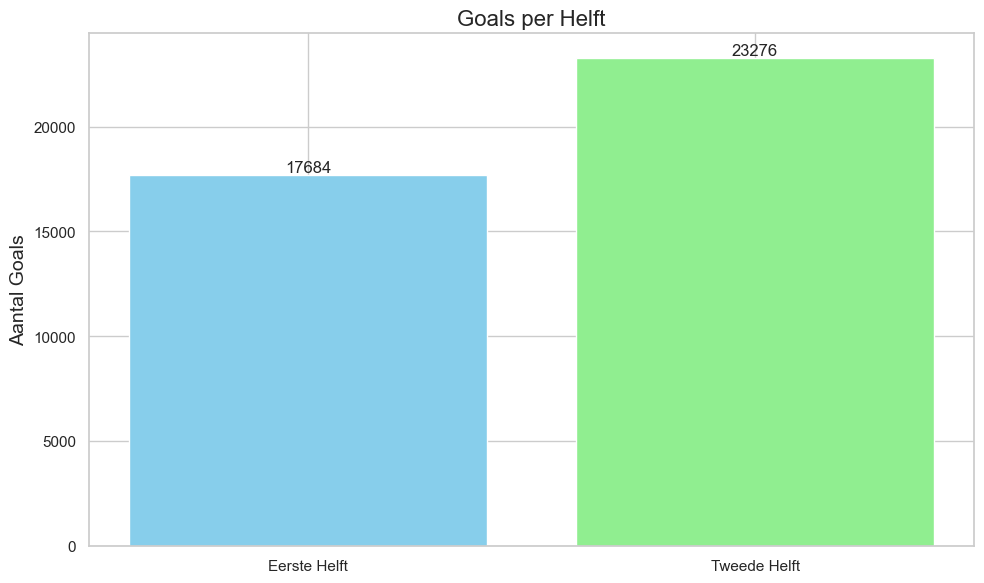

In [10]:
# Plot instellingen met seaborn
sns.set(style="whitegrid")
labels = ['Eerste Helft', 'Tweede Helft']
colors = ['skyblue', 'lightgreen']

# Staafdiagram maken
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color=colors)
plt.title('Goals per Helft', fontsize=16)
plt.ylabel('Aantal Goals', fontsize=14)

# Zij balken
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()
